In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_tabnet
import pickle
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.augmentations import ClassificationSMOTE

from sklearn.preprocessing import LabelEncoder

from Utility import *

from matplotlib import pyplot as plt

### Define optimizers

In [3]:
sgd = torch.optim.SGD
adam = torch.optim.Adam

# SGD

In [3]:
sgd_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### SGD; N = 50, p = 6, d = 4

In [4]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.21465 | train_auc: 0.54688 | valid_auc: 0.4     |  0:00:00s
epoch 1  | loss: 1.61963 | train_auc: 0.4875  | valid_auc: 0.7     |  0:00:00s
epoch 2  | loss: 1.75967 | train_auc: 0.5125  | valid_auc: 0.6     |  0:00:00s
epoch 3  | loss: 1.70595 | train_auc: 0.47812 | valid_auc: 0.6     |  0:00:01s
epoch 4  | loss: 1.84657 | train_auc: 0.49375 | valid_auc: 0.6     |  0:00:01s
epoch 5  | loss: 1.65767 | train_auc: 0.47188 | valid_auc: 0.6     |  0:00:01s
epoch 6  | loss: 2.2104  | train_auc: 0.45625 | valid_auc: 0.6     |  0:00:01s
epoch 7  | loss: 1.33817 | train_auc: 0.44688 | valid_auc: 0.6     |  0:00:01s
epoch 8  | loss: 1.54756 | train_auc: 0.44375 | valid_auc: 0.6     |  0:00:01s
epoch 9  | loss: 1.44831 | train_auc: 0.44688 | valid_auc: 0.6     |  0:00:02s
epoch 10 | loss: 2.24587 | train_auc: 0.47188 | valid_auc: 0.6     |  0:00:02s
epoch 11 | loss: 1.38831 | train_auc: 0.475   | valid_auc: 0.6     |  0:00:02s
epoch 12 | loss: 1.91521 | train_auc: 0.46562 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.1282958946357814
Average irrelevant feature importance: 0.09786318122653181
Average random feature importance: 0.11245466676221044
Train AUC score: 0.478125
Validation AUC score: 0.8
Test AUC score: 1.0
False negative rate for relevant features: 0.5
False positive rate for irrelevant features: 0.3333333333333333
False positive rate for random features: 0.5


C:\Users\hberg\AppData\Local\Temp\ipykernel_44896\1053820611.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)


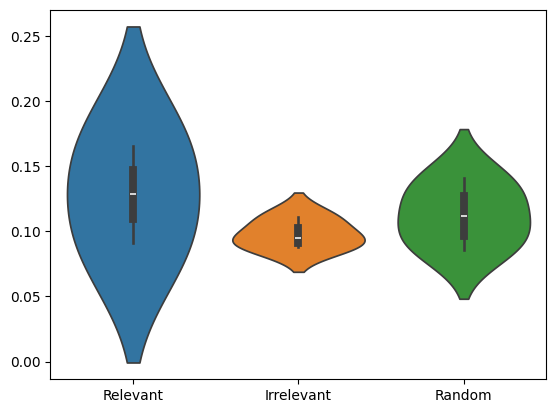

In [5]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 50, p = 60, d = 40

In [6]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.97074 | train_auc: 0.43235 | valid_auc: 0.66667 |  0:00:00s
epoch 1  | loss: 0.9382  | train_auc: 0.49706 | valid_auc: 0.83333 |  0:00:00s
epoch 2  | loss: 0.75818 | train_auc: 0.52941 | valid_auc: 0.66667 |  0:00:00s
epoch 3  | loss: 0.7593  | train_auc: 0.52647 | valid_auc: 0.66667 |  0:00:00s
epoch 4  | loss: 0.84651 | train_auc: 0.47647 | valid_auc: 0.66667 |  0:00:01s
epoch 5  | loss: 0.71945 | train_auc: 0.47647 | valid_auc: 0.66667 |  0:00:01s
epoch 6  | loss: 0.95821 | train_auc: 0.47353 | valid_auc: 0.66667 |  0:00:01s
epoch 7  | loss: 1.09062 | train_auc: 0.47059 | valid_auc: 1.0     |  0:00:01s
epoch 8  | loss: 0.8452  | train_auc: 0.48235 | valid_auc: 1.0     |  0:00:02s
epoch 9  | loss: 0.88867 | train_auc: 0.47647 | valid_auc: 1.0     |  0:00:02s
epoch 10 | loss: 0.94508 | train_auc: 0.47353 | valid_auc: 1.0     |  0:00:02s
epoch 11 | loss: 1.00452 | train_auc: 0.50882 | valid_auc: 1.0     |  0:00:03s
epoch 12 | loss: 0.7993  | train_auc: 0.52059 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.01015840993389252
Average irrelevant feature importance: 0.012008535162063108
Average random feature importance: 0.008351232642155001
Train AUC score: 0.47058823529411764
Validation AUC score: 1.0
Test AUC score: 0.75
False negative rate for relevant features: 0.5652173913043478
False positive rate for irrelevant features: 0.5833333333333334
False positive rate for random features: 0.45


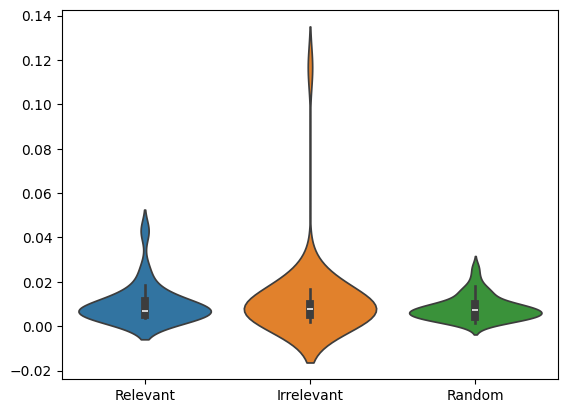

In [7]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 50, p = 600, d = 400

In [8]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.99598 | train_auc: 0.4375  | valid_auc: 0.75    |  0:00:00s
epoch 1  | loss: 0.79563 | train_auc: 0.34226 | valid_auc: 1.0     |  0:00:01s
epoch 2  | loss: 1.02038 | train_auc: 0.40179 | valid_auc: 1.0     |  0:00:02s
epoch 3  | loss: 0.90847 | train_auc: 0.37202 | valid_auc: 1.0     |  0:00:03s
epoch 4  | loss: 1.09446 | train_auc: 0.35119 | valid_auc: 1.0     |  0:00:04s
epoch 5  | loss: 0.81628 | train_auc: 0.36012 | valid_auc: 1.0     |  0:00:05s
epoch 6  | loss: 0.90812 | train_auc: 0.33631 | valid_auc: 0.75    |  0:00:06s
epoch 7  | loss: 0.72494 | train_auc: 0.36012 | valid_auc: 0.66667 |  0:00:07s
epoch 8  | loss: 0.91837 | train_auc: 0.44048 | valid_auc: 0.66667 |  0:00:07s
epoch 9  | loss: 0.8069  | train_auc: 0.41369 | valid_auc: 0.66667 |  0:00:08s
epoch 10 | loss: 0.75635 | train_auc: 0.45536 | valid_auc: 0.58333 |  0:00:09s
epoch 11 | loss: 1.1294  | train_auc: 0.48214 | valid_auc: 0.41667 |  0:00:10s
epoch 12 | loss: 0.92921 | train_auc: 0.52083 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.00048670901487472655
Average irrelevant feature importance: 0.0009341655737010315
Average random feature importance: 0.0011458327092653358
Train AUC score: 0.3422619047619047
Validation AUC score: 1.0
Test AUC score: 0.75
False negative rate for relevant features: 0.575
False positive rate for irrelevant features: 0.5134168157423972
False positive rate for random features: 0.4875


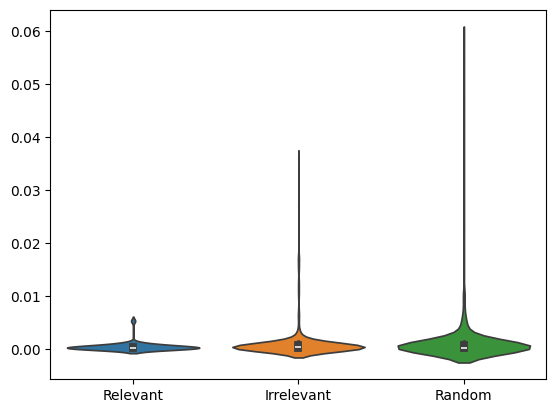

In [9]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 500, p = 6, d = 4

In [10]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.99625 | train_auc: 0.45269 | valid_auc: 0.37931 |  0:00:01s
epoch 1  | loss: 1.02681 | train_auc: 0.45475 | valid_auc: 0.37931 |  0:00:02s
epoch 2  | loss: 0.97364 | train_auc: 0.46247 | valid_auc: 0.43194 |  0:00:03s
epoch 3  | loss: 0.94902 | train_auc: 0.49954 | valid_auc: 0.45372 |  0:00:04s
epoch 4  | loss: 0.90081 | train_auc: 0.49823 | valid_auc: 0.44465 |  0:00:05s
epoch 5  | loss: 0.97165 | train_auc: 0.48571 | valid_auc: 0.4392  |  0:00:06s
epoch 6  | loss: 0.91455 | train_auc: 0.48697 | valid_auc: 0.40653 |  0:00:07s
epoch 7  | loss: 0.93494 | train_auc: 0.47441 | valid_auc: 0.39383 |  0:00:08s
epoch 8  | loss: 0.97244 | train_auc: 0.48581 | valid_auc: 0.41379 |  0:00:09s
epoch 9  | loss: 0.89499 | train_auc: 0.48098 | valid_auc: 0.39746 |  0:00:10s
epoch 10 | loss: 0.80097 | train_auc: 0.50556 | valid_auc: 0.4755  |  0:00:11s
epoch 11 | loss: 0.95047 | train_auc: 0.51293 | valid_auc: 0.47731 |  0:00:11s
epoch 12 | loss: 0.86482 | train_auc: 0.52115 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.13592516329634352
Average irrelevant feature importance: 0.1293555306221135
Average random feature importance: 0.0833783622166856
Train AUC score: 0.9194565744784085
Validation AUC score: 0.970961887477314
Test AUC score: 0.9057017543859649
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


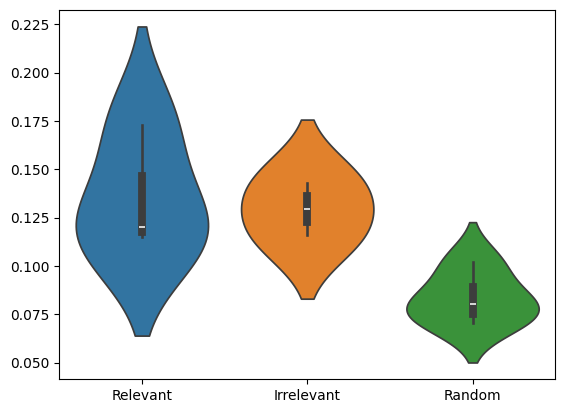

In [11]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 500, p = 60, d = 40

In [12]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.00672 | train_auc: 0.45919 | valid_auc: 0.55273 |  0:00:01s
epoch 1  | loss: 1.00874 | train_auc: 0.49433 | valid_auc: 0.50586 |  0:00:02s
epoch 2  | loss: 0.93048 | train_auc: 0.49569 | valid_auc: 0.49805 |  0:00:03s
epoch 3  | loss: 0.89522 | train_auc: 0.50964 | valid_auc: 0.56445 |  0:00:04s
epoch 4  | loss: 0.88151 | train_auc: 0.50045 | valid_auc: 0.53516 |  0:00:05s
epoch 5  | loss: 1.01883 | train_auc: 0.51528 | valid_auc: 0.47266 |  0:00:07s
epoch 6  | loss: 0.88373 | train_auc: 0.50811 | valid_auc: 0.50195 |  0:00:08s
epoch 7  | loss: 0.90581 | train_auc: 0.50362 | valid_auc: 0.50781 |  0:00:09s
epoch 8  | loss: 0.89733 | train_auc: 0.48947 | valid_auc: 0.50977 |  0:00:10s
epoch 9  | loss: 0.95511 | train_auc: 0.50969 | valid_auc: 0.51758 |  0:00:11s
epoch 10 | loss: 0.94617 | train_auc: 0.50743 | valid_auc: 0.51172 |  0:00:12s
epoch 11 | loss: 0.9455  | train_auc: 0.53314 | valid_auc: 0.51367 |  0:00:13s
epoch 12 | loss: 0.86919 | train_auc: 0.52371 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.00999993659171867
Average irrelevant feature importance: 0.01058568853578409
Average random feature importance: 0.009649697784547908
Train AUC score: 0.5277850727454173
Validation AUC score: 0.71484375
Test AUC score: 0.5341880341880342
False negative rate for relevant features: 0.3888888888888889
False positive rate for irrelevant features: 0.5121951219512195
False positive rate for random features: 0.425


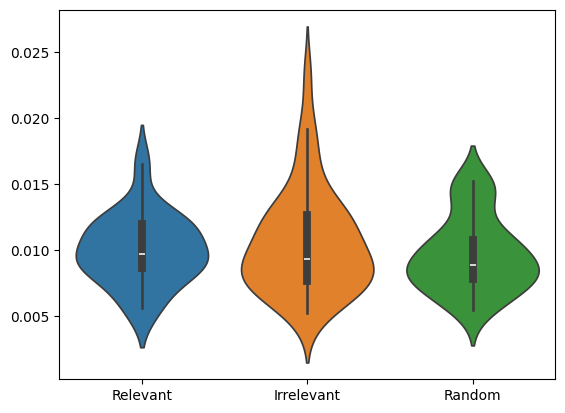

In [13]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 500, p = 600, d = 400

In [14]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.33994 | train_auc: 0.37277 | valid_auc: 0.39312 |  0:00:02s
epoch 1  | loss: 1.32889 | train_auc: 0.39835 | valid_auc: 0.47645 |  0:00:04s
epoch 2  | loss: 1.45197 | train_auc: 0.40928 | valid_auc: 0.40942 |  0:00:07s
epoch 3  | loss: 1.35469 | train_auc: 0.38522 | valid_auc: 0.43659 |  0:00:09s
epoch 4  | loss: 1.30218 | train_auc: 0.4139  | valid_auc: 0.45652 |  0:00:12s
epoch 5  | loss: 1.40294 | train_auc: 0.43643 | valid_auc: 0.48188 |  0:00:14s
epoch 6  | loss: 1.40906 | train_auc: 0.43122 | valid_auc: 0.48913 |  0:00:16s
epoch 7  | loss: 1.41508 | train_auc: 0.47437 | valid_auc: 0.42935 |  0:00:18s
epoch 8  | loss: 1.3615  | train_auc: 0.47387 | valid_auc: 0.51449 |  0:00:20s
epoch 9  | loss: 1.38839 | train_auc: 0.46651 | valid_auc: 0.41304 |  0:00:23s
epoch 10 | loss: 1.34552 | train_auc: 0.48572 | valid_auc: 0.50543 |  0:00:25s
epoch 11 | loss: 1.32635 | train_auc: 0.4692  | valid_auc: 0.56159 |  0:00:28s
epoch 12 | loss: 1.30896 | train_auc: 0.45875 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0009388255851625773
Average irrelevant feature importance: 0.0010111226171607103
Average random feature importance: 0.0010033759110613838
Train AUC score: 0.5132524707996406
Validation AUC score: 0.701086956521739
Test AUC score: 0.4948148148148148
False negative rate for relevant features: 0.4948453608247423
False positive rate for irrelevant features: 0.4900398406374502
False positive rate for random features: 0.51


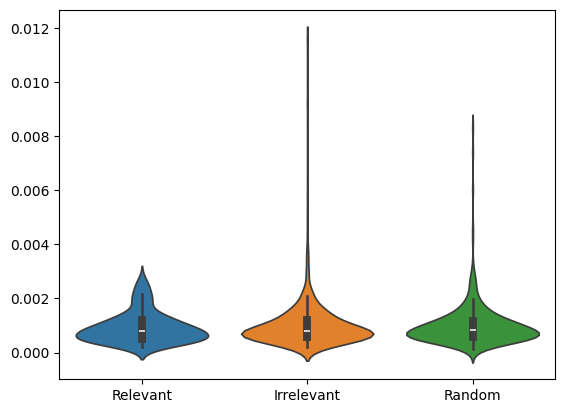

In [15]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)
plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 5000, p = 6, d = 4

In [16]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.92749 | train_auc: 0.56111 | valid_auc: 0.5621  |  0:00:10s
epoch 1  | loss: 0.79269 | train_auc: 0.59333 | valid_auc: 0.58412 |  0:00:20s
epoch 2  | loss: 0.69607 | train_auc: 0.64517 | valid_auc: 0.63025 |  0:00:29s
epoch 3  | loss: 0.65937 | train_auc: 0.67012 | valid_auc: 0.65509 |  0:00:38s
epoch 4  | loss: 0.6614  | train_auc: 0.69218 | valid_auc: 0.68182 |  0:00:46s
epoch 5  | loss: 0.63151 | train_auc: 0.71876 | valid_auc: 0.70793 |  0:00:55s
epoch 6  | loss: 0.62284 | train_auc: 0.75418 | valid_auc: 0.74255 |  0:01:04s
epoch 7  | loss: 0.61163 | train_auc: 0.77025 | valid_auc: 0.7647  |  0:01:12s
epoch 8  | loss: 0.61093 | train_auc: 0.78539 | valid_auc: 0.77982 |  0:01:21s
epoch 9  | loss: 0.59271 | train_auc: 0.79393 | valid_auc: 0.79222 |  0:01:29s
epoch 10 | loss: 0.59618 | train_auc: 0.79162 | valid_auc: 0.79346 |  0:01:38s
epoch 11 | loss: 0.58175 | train_auc: 0.80828 | valid_auc: 0.80459 |  0:01:47s
epoch 12 | loss: 0.58689 | train_auc: 0.81874 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.14100298550253967
Average irrelevant feature importance: 0.28147204281223887
Average random feature importance: 0.03862900379440058
Train AUC score: 0.9024923585950864
Validation AUC score: 0.9172522969034339
Test AUC score: 0.930055530237818
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


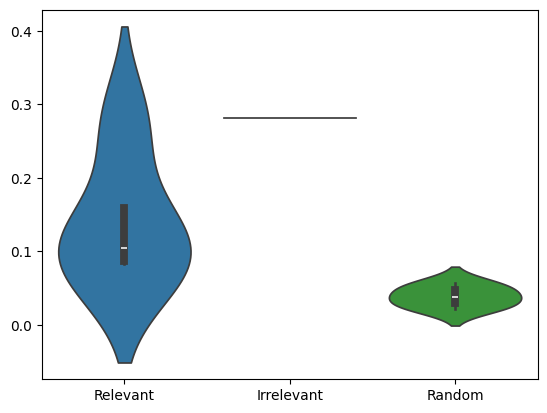

In [17]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 5000, p = 60, d = 40

In [18]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.8534  | train_auc: 0.49392 | valid_auc: 0.45835 |  0:00:13s
epoch 1  | loss: 0.85164 | train_auc: 0.50157 | valid_auc: 0.51488 |  0:00:24s
epoch 2  | loss: 0.84132 | train_auc: 0.50225 | valid_auc: 0.48694 |  0:00:36s
epoch 3  | loss: 0.83713 | train_auc: 0.50739 | valid_auc: 0.52018 |  0:00:45s
epoch 4  | loss: 0.85064 | train_auc: 0.51133 | valid_auc: 0.5233  |  0:00:55s
epoch 5  | loss: 0.83235 | train_auc: 0.52367 | valid_auc: 0.57898 |  0:01:04s
epoch 6  | loss: 0.82917 | train_auc: 0.51605 | valid_auc: 0.54677 |  0:01:14s
epoch 7  | loss: 0.82584 | train_auc: 0.51691 | valid_auc: 0.52427 |  0:01:23s
epoch 8  | loss: 0.79389 | train_auc: 0.52527 | valid_auc: 0.55807 |  0:01:31s
epoch 9  | loss: 0.80475 | train_auc: 0.53775 | valid_auc: 0.58266 |  0:01:39s
epoch 10 | loss: 0.79451 | train_auc: 0.53611 | valid_auc: 0.56926 |  0:01:47s
epoch 11 | loss: 0.78998 | train_auc: 0.52768 | valid_auc: 0.56595 |  0:01:55s
epoch 12 | loss: 0.78843 | train_auc: 0.54103 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.007645950798929888
Average irrelevant feature importance: 0.015337668927482284
Average random feature importance: 0.004492160817315536
Train AUC score: 0.9097645161163492
Validation AUC score: 0.914606539705354
Test AUC score: 0.884495867768595
False negative rate for relevant features: 0.09090909090909091
False positive rate for irrelevant features: 0.6458333333333334
False positive rate for random features: 0.2


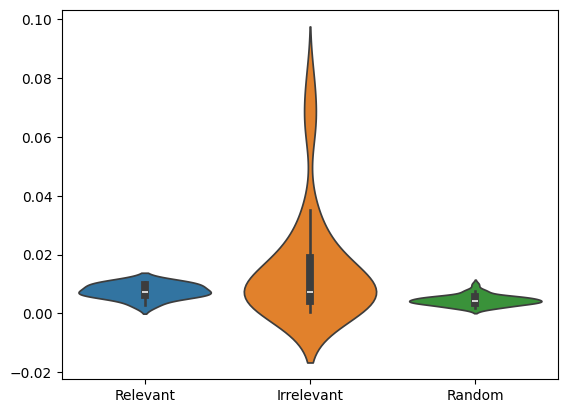

In [19]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 5000, p = 600, d = 400

In [21]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.92222 | train_auc: 0.4466  | valid_auc: 0.46953 |  0:00:20s
epoch 1  | loss: 0.90994 | train_auc: 0.46335 | valid_auc: 0.45925 |  0:00:39s
epoch 2  | loss: 0.90364 | train_auc: 0.46705 | valid_auc: 0.47604 |  0:00:59s
epoch 3  | loss: 0.94565 | train_auc: 0.46612 | valid_auc: 0.44394 |  0:01:20s
epoch 4  | loss: 0.90471 | train_auc: 0.47003 | valid_auc: 0.48858 |  0:01:39s
epoch 5  | loss: 0.88932 | train_auc: 0.4769  | valid_auc: 0.50036 |  0:01:57s
epoch 6  | loss: 0.914   | train_auc: 0.47217 | valid_auc: 0.49435 |  0:02:15s
epoch 7  | loss: 0.91641 | train_auc: 0.48263 | valid_auc: 0.50192 |  0:02:33s
epoch 8  | loss: 0.89247 | train_auc: 0.47244 | valid_auc: 0.49236 |  0:02:51s
epoch 9  | loss: 0.8844  | train_auc: 0.47244 | valid_auc: 0.49292 |  0:03:09s
epoch 10 | loss: 0.88802 | train_auc: 0.47879 | valid_auc: 0.47504 |  0:03:27s
epoch 11 | loss: 0.89454 | train_auc: 0.48931 | valid_auc: 0.49682 |  0:03:45s
epoch 12 | loss: 0.89952 | train_auc: 0.4954  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0010100169078925982
Average irrelevant feature importance: 0.0010546540777209752
Average random feature importance: 0.0009584855200423892
Train AUC score: 0.5501982509774613
Validation AUC score: 0.6065570981352933
Test AUC score: 0.5198290989547569
False negative rate for relevant features: 0.49557522123893805
False positive rate for irrelevant features: 0.5230769230769231
False positive rate for random features: 0.48


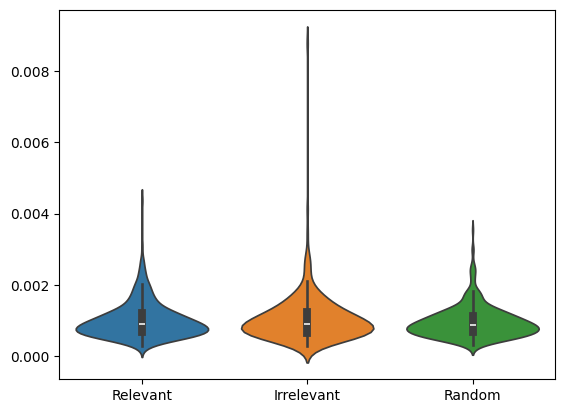

In [22]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

In [23]:
sgd_df.to_csv(os.path.join("Results/SGD", "sgd_data.csv"), index=False)

# Adam

In [4]:
adam_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### Adam; N = 50, p = 6, d = 4

In [5]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.05407 | train_auc: 0.54427 | valid_auc: 0.0     |  0:00:01s
epoch 1  | loss: 1.15311 | train_auc: 0.57813 | valid_auc: 0.25    |  0:00:01s
epoch 2  | loss: 1.33226 | train_auc: 0.64063 | valid_auc: 0.0     |  0:00:01s
epoch 3  | loss: 1.15509 | train_auc: 0.625   | valid_auc: 0.0     |  0:00:01s
epoch 4  | loss: 0.91265 | train_auc: 0.6224  | valid_auc: 0.0     |  0:00:01s
epoch 5  | loss: 0.83238 | train_auc: 0.66406 | valid_auc: 0.0     |  0:00:01s
epoch 6  | loss: 0.94596 | train_auc: 0.69531 | valid_auc: 0.0     |  0:00:01s
epoch 7  | loss: 0.78744 | train_auc: 0.7526  | valid_auc: 0.0     |  0:00:01s
epoch 8  | loss: 0.77046 | train_auc: 0.7474  | valid_auc: 0.0     |  0:00:02s
epoch 9  | loss: 0.78052 | train_auc: 0.75781 | valid_auc: 0.0     |  0:00:02s
epoch 10 | loss: 0.87172 | train_auc: 0.73698 | valid_auc: 0.0     |  0:00:02s
epoch 11 | loss: 0.6292  | train_auc: 0.76042 | valid_auc: 0.0     |  0:00:02s
epoch 12 | loss: 0.75392 | train_auc: 0.75    | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.2076626614871707
Average irrelevant feature importance: 0.06745704948207386
Average random feature importance: 0.09557588214485924
Train AUC score: 0.8984375
Validation AUC score: 1.0
Test AUC score: 0.8333333333333334
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.3333333333333333
False positive rate for random features: 0.5


C:\Users\hberg\AppData\Local\Temp\ipykernel_9376\2164218204.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)


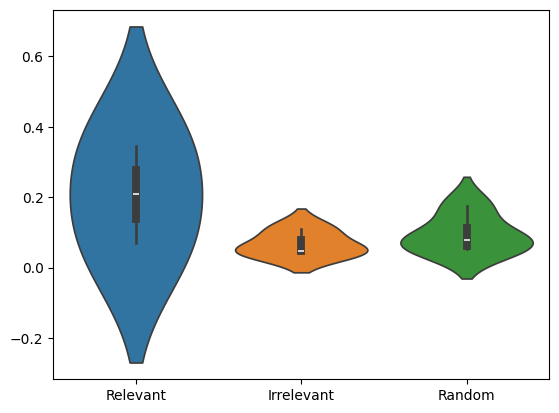

In [6]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 50, p = 60, d = 40

In [8]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.08248 | train_auc: 0.75232 | valid_auc: 0.16667 |  0:00:00s
epoch 1  | loss: 0.77513 | train_auc: 0.66563 | valid_auc: 0.5     |  0:00:00s
epoch 2  | loss: 0.91266 | train_auc: 0.60372 | valid_auc: 0.33333 |  0:00:00s
epoch 3  | loss: 0.81348 | train_auc: 0.55418 | valid_auc: 0.41667 |  0:00:00s
epoch 4  | loss: 0.71869 | train_auc: 0.54799 | valid_auc: 0.5     |  0:00:00s
epoch 5  | loss: 0.74526 | train_auc: 0.52941 | valid_auc: 0.5     |  0:00:01s
epoch 6  | loss: 0.82774 | train_auc: 0.5387  | valid_auc: 0.33333 |  0:00:01s
epoch 7  | loss: 0.8115  | train_auc: 0.55418 | valid_auc: 0.5     |  0:00:01s
epoch 8  | loss: 0.73565 | train_auc: 0.58204 | valid_auc: 0.83333 |  0:00:01s
epoch 9  | loss: 0.70948 | train_auc: 0.60062 | valid_auc: 0.75    |  0:00:01s
epoch 10 | loss: 0.65771 | train_auc: 0.613   | valid_auc: 0.75    |  0:00:02s
epoch 11 | loss: 0.7247  | train_auc: 0.65635 | valid_auc: 0.75    |  0:00:02s
epoch 12 | loss: 0.74463 | train_auc: 0.69659 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.004830936939602458
Average irrelevant feature importance: 0.011655672851376862
Average random feature importance: 0.011732105693489408
Train AUC score: 1.0
Validation AUC score: 1.0
Test AUC score: 0.08333333333333333
False negative rate for relevant features: 0.6086956521739131
False positive rate for irrelevant features: 0.5555555555555556
False positive rate for random features: 0.525


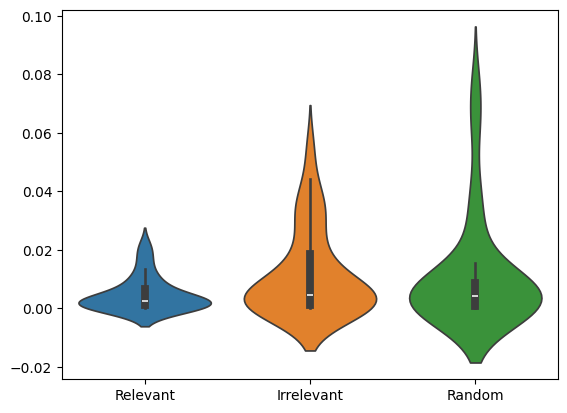

In [9]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 50, p = 600, d = 400

In [10]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.84423 | train_auc: 0.49123 | valid_auc: 0.0     |  0:00:00s
epoch 1  | loss: 0.91112 | train_auc: 0.60819 | valid_auc: 0.0     |  0:00:01s
epoch 2  | loss: 0.92515 | train_auc: 0.52047 | valid_auc: 0.0     |  0:00:02s
epoch 3  | loss: 0.92139 | train_auc: 0.69298 | valid_auc: 0.0     |  0:00:02s
epoch 4  | loss: 0.82284 | train_auc: 0.66667 | valid_auc: 0.0     |  0:00:03s
epoch 5  | loss: 0.79832 | train_auc: 0.74561 | valid_auc: 0.25    |  0:00:04s
epoch 6  | loss: 0.79151 | train_auc: 0.64912 | valid_auc: 1.0     |  0:00:05s
epoch 7  | loss: 0.72883 | train_auc: 0.66082 | valid_auc: 1.0     |  0:00:06s
epoch 8  | loss: 0.74973 | train_auc: 0.64035 | valid_auc: 1.0     |  0:00:06s
epoch 9  | loss: 0.70944 | train_auc: 0.71345 | valid_auc: 1.0     |  0:00:07s
epoch 10 | loss: 0.82031 | train_auc: 0.7193  | valid_auc: 0.75    |  0:00:08s
epoch 11 | loss: 0.71036 | train_auc: 0.65205 | valid_auc: 0.0     |  0:00:08s
epoch 12 | loss: 0.70278 | train_auc: 0.58187 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0007408851140605547
Average irrelevant feature importance: 0.0009979691898747312
Average random feature importance: 0.001031249545744008
Train AUC score: 0.6491228070175439
Validation AUC score: 1.0
Test AUC score: 0.5625
False negative rate for relevant features: 0.5
False positive rate for irrelevant features: 0.5098389982110912
False positive rate for random features: 0.485


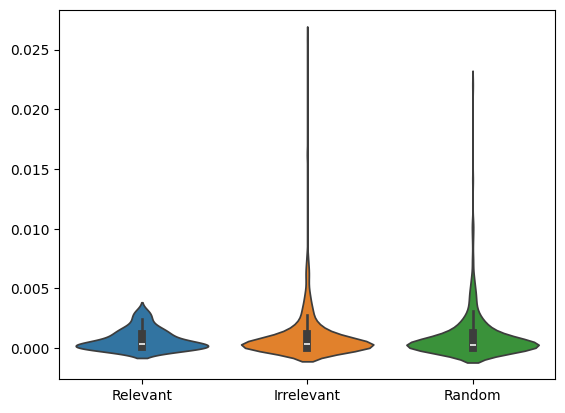

In [11]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 6, d = 4

In [12]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.81395 | train_auc: 0.75213 | valid_auc: 0.73866 |  0:00:00s
epoch 1  | loss: 0.60511 | train_auc: 0.87149 | valid_auc: 0.81307 |  0:00:01s
epoch 2  | loss: 0.58498 | train_auc: 0.89486 | valid_auc: 0.81125 |  0:00:02s
epoch 3  | loss: 0.45871 | train_auc: 0.92365 | valid_auc: 0.87296 |  0:00:03s
epoch 4  | loss: 0.50416 | train_auc: 0.93651 | valid_auc: 0.94555 |  0:00:03s
epoch 5  | loss: 0.46546 | train_auc: 0.95121 | valid_auc: 0.96552 |  0:00:04s
epoch 6  | loss: 0.38737 | train_auc: 0.95257 | valid_auc: 0.95644 |  0:00:05s
epoch 7  | loss: 0.38161 | train_auc: 0.95788 | valid_auc: 0.94192 |  0:00:06s
epoch 8  | loss: 0.33505 | train_auc: 0.9589  | valid_auc: 0.98911 |  0:00:07s
epoch 9  | loss: 0.30488 | train_auc: 0.95643 | valid_auc: 0.99637 |  0:00:07s
epoch 10 | loss: 0.33893 | train_auc: 0.95956 | valid_auc: 0.97641 |  0:00:08s
epoch 11 | loss: 0.29661 | train_auc: 0.96955 | valid_auc: 0.99819 |  0:00:09s
epoch 12 | loss: 0.29876 | train_auc: 0.9886  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.20347753447530392
Average irrelevant feature importance: 0.12064449326307383
Average random feature importance: 0.03706960251198518
Train AUC score: 0.9779475982532752
Validation AUC score: 1.0
Test AUC score: 0.9671052631578948
False negative rate for relevant features: 0.3333333333333333
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


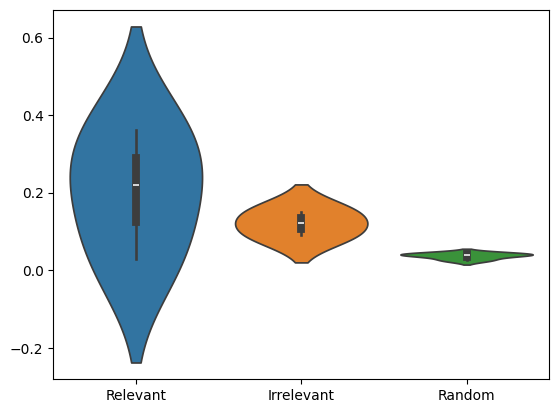

In [13]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 60, d = 40

In [14]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.81649 | train_auc: 0.56009 | valid_auc: 0.64453 |  0:00:01s
epoch 1  | loss: 0.76603 | train_auc: 0.54486 | valid_auc: 0.52148 |  0:00:02s
epoch 2  | loss: 0.71809 | train_auc: 0.5437  | valid_auc: 0.5918  |  0:00:03s
epoch 3  | loss: 0.70612 | train_auc: 0.54401 | valid_auc: 0.42773 |  0:00:04s
epoch 4  | loss: 0.69389 | train_auc: 0.5417  | valid_auc: 0.58398 |  0:00:05s
epoch 5  | loss: 0.73737 | train_auc: 0.56095 | valid_auc: 0.62109 |  0:00:06s
epoch 6  | loss: 0.70674 | train_auc: 0.59305 | valid_auc: 0.59961 |  0:00:08s
epoch 7  | loss: 0.68424 | train_auc: 0.62143 | valid_auc: 0.62109 |  0:00:09s
epoch 8  | loss: 0.70494 | train_auc: 0.62354 | valid_auc: 0.60352 |  0:00:10s
epoch 9  | loss: 0.68114 | train_auc: 0.63766 | valid_auc: 0.62109 |  0:00:11s
epoch 10 | loss: 0.68263 | train_auc: 0.61033 | valid_auc: 0.58984 |  0:00:12s
epoch 11 | loss: 0.67626 | train_auc: 0.59578 | valid_auc: 0.55078 |  0:00:13s
epoch 12 | loss: 0.67727 | train_auc: 0.68252 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.016592403597463466
Average irrelevant feature importance: 0.014598735046117818
Average random feature importance: 0.002569714958870679
Train AUC score: 0.9956667892221229
Validation AUC score: 0.92578125
Test AUC score: 0.7065527065527066
False negative rate for relevant features: 0.5
False positive rate for irrelevant features: 0.5853658536585366
False positive rate for random features: 0.425


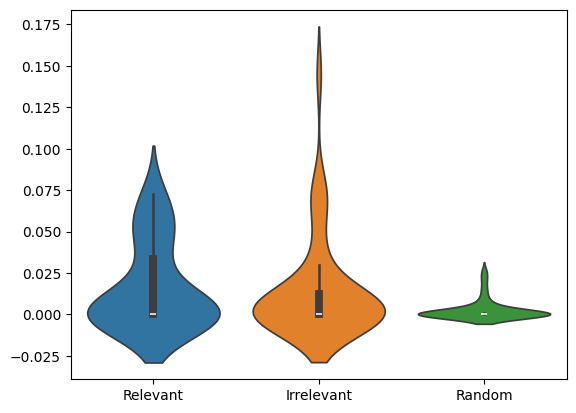

In [15]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 600, d = 400

In [16]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.09337 | train_auc: 0.38951 | valid_auc: 0.38587 |  0:00:02s
epoch 1  | loss: 0.78122 | train_auc: 0.46254 | valid_auc: 0.45109 |  0:00:04s
epoch 2  | loss: 0.69713 | train_auc: 0.76033 | valid_auc: 0.7971  |  0:00:06s
epoch 3  | loss: 0.59402 | train_auc: 0.64722 | valid_auc: 0.79167 |  0:00:07s
epoch 4  | loss: 0.62665 | train_auc: 0.78659 | valid_auc: 0.88043 |  0:00:09s
epoch 5  | loss: 0.63747 | train_auc: 0.73637 | valid_auc: 0.8587  |  0:00:11s
epoch 6  | loss: 0.57997 | train_auc: 0.78863 | valid_auc: 0.84601 |  0:00:13s
epoch 7  | loss: 0.56666 | train_auc: 0.82882 | valid_auc: 0.88768 |  0:00:15s
epoch 8  | loss: 0.50471 | train_auc: 0.85657 | valid_auc: 0.9221  |  0:00:17s
epoch 9  | loss: 0.53137 | train_auc: 0.87249 | valid_auc: 0.8913  |  0:00:19s
epoch 10 | loss: 0.50216 | train_auc: 0.86508 | valid_auc: 0.96377 |  0:00:21s
epoch 11 | loss: 0.51388 | train_auc: 0.896   | valid_auc: 0.96739 |  0:00:23s
epoch 12 | loss: 0.52191 | train_auc: 0.91517 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0010269717251881487
Average irrelevant feature importance: 0.0017648846170198822
Average random feature importance: 3.602916228192192e-05
Train AUC score: 0.9955825097334532
Validation AUC score: 0.9909420289855073
Test AUC score: 0.9377777777777777
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.21314741035856574
False positive rate for random features: 0.1225


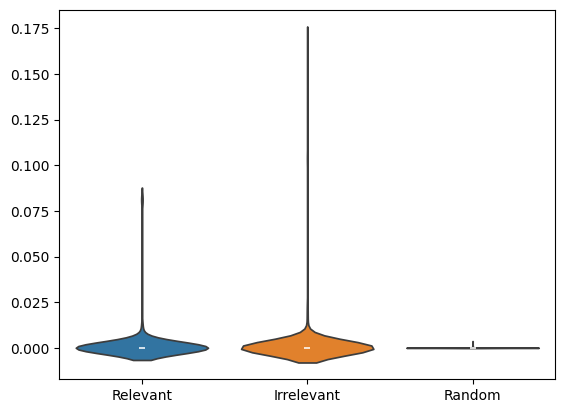

In [17]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 6, d = 4

In [18]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.55674 | train_auc: 0.88723 | valid_auc: 0.89    |  0:00:07s
epoch 1  | loss: 0.49071 | train_auc: 0.89849 | valid_auc: 0.90602 |  0:00:15s
epoch 2  | loss: 0.4772  | train_auc: 0.9037  | valid_auc: 0.91125 |  0:00:22s
epoch 3  | loss: 0.44879 | train_auc: 0.90221 | valid_auc: 0.91017 |  0:00:30s
epoch 4  | loss: 0.47262 | train_auc: 0.90601 | valid_auc: 0.91191 |  0:00:37s
epoch 5  | loss: 0.45978 | train_auc: 0.90649 | valid_auc: 0.90938 |  0:00:44s
epoch 6  | loss: 0.45487 | train_auc: 0.90709 | valid_auc: 0.90732 |  0:00:52s
epoch 7  | loss: 0.45506 | train_auc: 0.90577 | valid_auc: 0.91104 |  0:00:59s
epoch 8  | loss: 0.4607  | train_auc: 0.90564 | valid_auc: 0.90938 |  0:01:07s
epoch 9  | loss: 0.43723 | train_auc: 0.90621 | valid_auc: 0.91413 |  0:01:14s
epoch 10 | loss: 0.4448  | train_auc: 0.90558 | valid_auc: 0.91349 |  0:01:22s
epoch 11 | loss: 0.4236  | train_auc: 0.90628 | valid_auc: 0.91443 |  0:01:29s
epoch 12 | loss: 0.45527 | train_auc: 0.90825 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.17947663656963264
Average irrelevant feature importance: 0.27775976697072285
Average random feature importance: 0.00108342168768665
Train AUC score: 0.9155703858018026
Validation AUC score: 0.9250787826781671
Test AUC score: 0.939254308235016
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


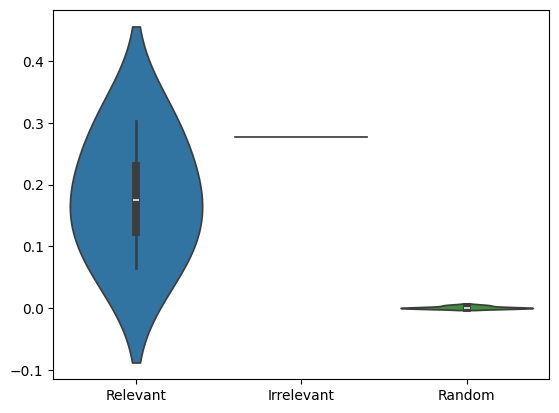

In [19]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 60, d = 40

In [20]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.63586 | train_auc: 0.87955 | valid_auc: 0.88949 |  0:00:08s
epoch 1  | loss: 0.51796 | train_auc: 0.91298 | valid_auc: 0.91468 |  0:00:16s
epoch 2  | loss: 0.45435 | train_auc: 0.9449  | valid_auc: 0.93403 |  0:00:25s
epoch 3  | loss: 0.42122 | train_auc: 0.9423  | valid_auc: 0.94197 |  0:00:33s
epoch 4  | loss: 0.4208  | train_auc: 0.95609 | valid_auc: 0.94966 |  0:00:42s
epoch 5  | loss: 0.38999 | train_auc: 0.96291 | valid_auc: 0.95417 |  0:00:50s
epoch 6  | loss: 0.37084 | train_auc: 0.96477 | valid_auc: 0.9585  |  0:00:59s
epoch 7  | loss: 0.35848 | train_auc: 0.96287 | valid_auc: 0.95891 |  0:01:07s
epoch 8  | loss: 0.35526 | train_auc: 0.96765 | valid_auc: 0.96107 |  0:01:16s
epoch 9  | loss: 0.33708 | train_auc: 0.96804 | valid_auc: 0.96807 |  0:01:24s
epoch 10 | loss: 0.34201 | train_auc: 0.96827 | valid_auc: 0.95961 |  0:01:33s
epoch 11 | loss: 0.32892 | train_auc: 0.97176 | valid_auc: 0.96838 |  0:01:41s
epoch 12 | loss: 0.35936 | train_auc: 0.97158 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0065819481344308985
Average irrelevant feature importance: 0.019309041543786275
Average random feature importance: 1.9114410487970055e-05
Train AUC score: 0.9980311632551959
Validation AUC score: 0.9967481135465326
Test AUC score: 0.9952396694214876
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.4791666666666667
False positive rate for random features: 0.3


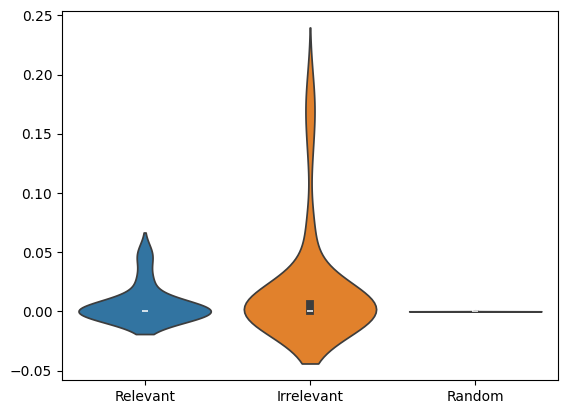

In [21]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 600, d = 400

In [22]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.70172 | train_auc: 0.68921 | valid_auc: 0.67308 |  0:00:17s
epoch 1  | loss: 0.5712  | train_auc: 0.85104 | valid_auc: 0.84348 |  0:00:35s
epoch 2  | loss: 0.53063 | train_auc: 0.86963 | valid_auc: 0.85236 |  0:00:52s
epoch 3  | loss: 0.52058 | train_auc: 0.87932 | valid_auc: 0.86514 |  0:01:10s
epoch 4  | loss: 0.51621 | train_auc: 0.87655 | valid_auc: 0.85738 |  0:01:28s
epoch 5  | loss: 0.49106 | train_auc: 0.88743 | valid_auc: 0.85496 |  0:01:45s
epoch 6  | loss: 0.4952  | train_auc: 0.88991 | valid_auc: 0.86106 |  0:02:03s
epoch 7  | loss: 0.48687 | train_auc: 0.89443 | valid_auc: 0.86683 |  0:02:20s
epoch 8  | loss: 0.47497 | train_auc: 0.89547 | valid_auc: 0.86473 |  0:02:38s
epoch 9  | loss: 0.47395 | train_auc: 0.89547 | valid_auc: 0.86681 |  0:02:55s
epoch 10 | loss: 0.46971 | train_auc: 0.89772 | valid_auc: 0.88084 |  0:03:13s
epoch 11 | loss: 0.46326 | train_auc: 0.90132 | valid_auc: 0.8867  |  0:03:31s
epoch 12 | loss: 0.47304 | train_auc: 0.9025  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.000994535496871797
Average irrelevant feature importance: 0.002498932502070937
Average random feature importance: 3.282504005504285e-05
Train AUC score: 0.991291307207767
Validation AUC score: 0.9255988224274052
Test AUC score: 0.9400635664101706
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.06153846153846154
False positive rate for random features: 0.025


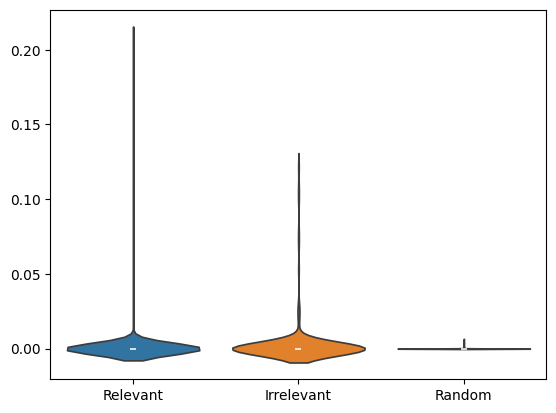

In [23]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

In [24]:
adam_df.to_csv(os.path.join("Results/Adam", "adam_data.csv"), index=False)